## Observations and Insights 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy import stats

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [39]:
# Combine the data into a single dataset with an outermerge (class demo - merging)
merged_df = pd.merge(mouse_metadata, study_results , on="Mouse ID", how="outer")
merged_df.tail(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1843,y769,Ceftamin,Female,6,27,35,63.430632,3
1844,y769,Ceftamin,Female,6,27,40,64.251028,4
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1846,y865,Ceftamin,Male,23,26,0,45.000000,0
1847,y865,Ceftamin,Male,23,26,5,46.735006,1
1848,y865,Ceftamin,Male,23,26,10,49.522740,1
1849,y865,Ceftamin,Male,23,26,15,50.806519,1
1850,y865,Ceftamin,Male,23,26,20,52.361982,1
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3


### Number of Mice

In [40]:
#get number of mice
pre_drop_mouse_count = len(merged_df["Mouse ID"].unique())
print("Number of Mice: " + str(pre_drop_mouse_count))

Number of Mice: 249


In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[['Mouse ID', 'Timepoint']]
duplicate_mice = duplicate_mice[duplicate_mice.duplicated()]
duplicate_mice.tail()

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [42]:
# Optional: Get all the data for the duplicate mouse ID. 
# cant include the tumor volume and metastatic sites
duplicate_mice = merged_df[['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)','Timepoint', 
                            'Tumor Volume (mm3)', 'Metastatic Sites']]
# duplicate_mice = duplicate_mice[duplicate_mice.duplicated()]
duplicate_mice[duplicate_mice['Mouse ID']=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)
#drop mouse by criteria Mouse ID = g989 - https://hackersandslackers.com/pandas-dataframe-drop/
mouse_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
mouse_df = mouse_df[mouse_df["Mouse ID"] != "g989"]
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### Number of Mice after mouse g989 removed

In [44]:
# Number of mice in the clean DataFrame
mouse_count = len(mouse_df["Mouse ID"].unique())
print("Number of Mice: " + str(mouse_count))

Number of Mice: 248


In [45]:
#list of drug regimens
mouse_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

### Summary Statistics Table - Tumor Volume 

In [46]:
#https://stackoverflow.com/questions/46639182/calculating-mean-std-dev-and-variance-and-creating-a-new-data-frame-from-these
drug_mean = mouse_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_median = mouse_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_var = mouse_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drug_std = mouse_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drug_sem = mouse_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

In [47]:
# Groupby - Summary stats table (mean, median, variance, standard deviation, and SEM) of the tumor volume for each regimen
drug_stats = pd.DataFrame({"Mean" : drug_mean,"Median": drug_median,"Variance": drug_var, 
                           "Std. Dev": drug_std, "Std. Error": drug_sem})
drug_stats

,Mean,Median,Variance,Std. Dev,Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [48]:
# Aggregation method - Summary stats table (mean, median, variance, std deviation, and SEM) of the tumor volume for each regimen


### Bar Charts - Total Measure Count per Drug

In [49]:
#Total Measurements Count
measure_count = mouse_df.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]

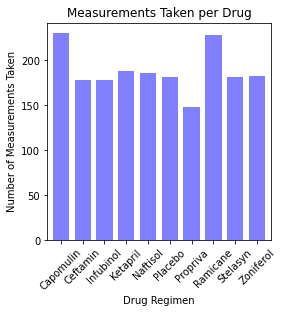

In [50]:
#Pandas Bar Chart: Total Measurements Count
measure_count.plot(kind="bar", color="b", alpha=.5, width=.75, figsize=(4,4))
plt.xticks(rotation=45)
# plt.xlim(-.9, len("Drug Regimen")-.1)
# plt.ylim(0, max(measurements) +50)
plt.title("Measurements Taken per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.show()

Text(0, 0.5, 'Number of Measurements Taken')

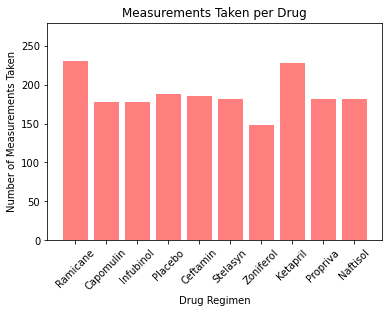

In [51]:
#Pyplot Bar Chart: Total Measurements Count
#(width of bars) https://stackoverflow.com/questions/14824456/edit-the-width-of-bars-using-dataframe-plot-function-in-matplotlib
drug = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

plt.bar(drug, measure_count, color = "r", alpha=.5, align="center")
plt.xticks(rotation=45)
plt.xlim(-.9, len(drug)-.1)
plt.ylim(0, max(measure_count) +50)
plt.title("Measurements Taken per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")

In [52]:
#Distribution of male vs. female
sex_sort = mouse_df[["Mouse ID", "Sex"]].drop_duplicates()
sex_count = sex_sort["Sex"].value_counts()
sex_count

Male      125
Female    123
Name: Sex, dtype: int64

### Pie Charts - Distribution Male vs. Female

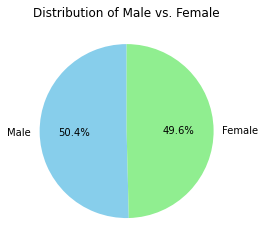

In [53]:
# Pandas Pie Chart: Female vs. Male
sex_pie = sex_count.plot(kind="pie", title="Distribution of Male vs. Female", autopct="%1.1f%%", 
                         startangle=90, colors = ["skyblue", "lightgreen"])
sex_pie.set_ylabel("")
sex_pie

(-1.1018390827045563,
 1.103492681505578,
 -1.1031843716069307,
 1.1001516367431872)

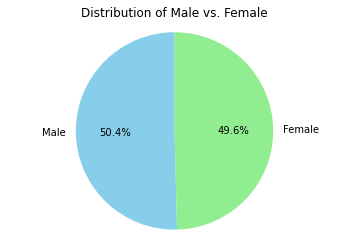

In [54]:
# Pyplot Pie Chart: Female vs. Male
sex = ["Male", "Female"]
count = sex_count
colors = ["skyblue", "lightgreen"]

plt.pie(count, labels=sex, colors = colors, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Male vs. Female")
plt.axis("equal")

### Maximum Tumor Volume by Drug

In [66]:
# Start by getting the last (greatest) timepoint for each mouse
max_tumor_vol = pd.DataFrame(mouse_df.groupby(["Mouse ID"]).max().reset_index())
max_tumor_vol.head(60)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
5,a401,Zoniferol,Female,8,25,45,66.794156,4
6,a411,Ramicane,Male,3,22,45,45.466677,1
7,a444,Ramicane,Female,10,25,45,45.000000,0
8,a457,Ketapril,Female,11,30,10,49.783419,0
9,a492,Stelasyn,Male,20,25,45,60.122011,1


### Quartiles and Outliers (Capomulin, Ramicane, Infubinol, Ceftamin)

In [56]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_list = []
space = '\n'
for drug in treatments:
    drug_list = max_tumor_vol.loc[max_tumor_vol["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    tumor_list.append(drug_list)
    quartiles = drug_list.quantile([.25,.5,.75])
    lowerq = quartiles.loc[0.25]
    upperq = quartiles.loc[0.75]
    iqr = upperq-lowerq
    print(f"{drug} Data: ")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles.loc[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers. {space}")

Capomulin Data: 
The lower quartile of Capomulin is: 45.0
The upper quartile of Capomulin is: 46.74900552
The interquartile range of Capomulin is: 1.7490055199999972
The the median of Capomulin is: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers. 

Ramicane Data: 
The lower quartile of Ramicane is: 45.0
The upper quartile of Ramicane is: 46.34383237
The interquartile range of Ramicane is: 1.3438323700000012
The the median of Ramicane is: 45.52187471 
Values below 42.984251445 could be outliers.
Values above 48.359580925 could be outliers. 

Infubinol Data: 
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers. 

Ceftamin Data: 
The lower quartile of Ceftamin is: 48.72207785
The u

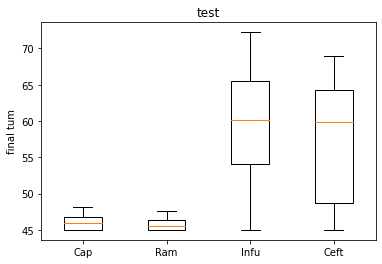

In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker = "x", markerfacecolor = "red", markersize=7, markeredgecolor = "red")
plt.boxplot(tumor_list, flierprops = flierprops )

plt.title("test")
plt.ylabel("final tum")
plt.xticks([1,2,3,4], ["Cap", "Ram", "Infu", "Ceft"])
plt.show()

## Line and Scatter Plots

In [58]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
stella_x401 = mouse_df[mouse_df["Mouse ID"]=="x401"]
stella_x401

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


### Line Plot: Tumor Volume vs. Timepoint (mouse x401)

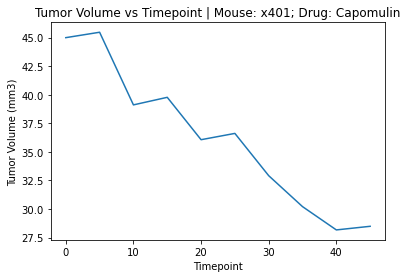

In [59]:
cap_tumor_line=stella_x401[stella_x401["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
cap_timepoint_line=stella_x401[stella_x401["Drug Regimen"]=="Capomulin"]["Timepoint"]
plt.plot(cap_timepoint_line,cap_tumor_line)
plt.title("Tumor Volume vs Timepoint | Mouse: x401; Drug: Capomulin", weight=4)
plt.xlabel("Timepoint", weight =4)
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [60]:
cap_group=mouse_df[mouse_df["Drug Regimen"]=="Capomulin"]
cap_group

cap_weight_avg_tumor = pd.DataFrame(cap_group.groupby("Weight (g)").mean()["Tumor Volume (mm3)"]).reset_index()
cap_weight_avg_tumor

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


### Scatter Plot: Weight vs. Tumor Volume

Text(0, 0.5, 'Tumor Volume (mm3)')

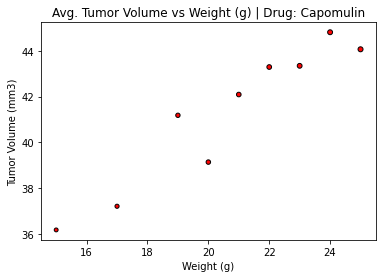

In [61]:
weight = cap_weight_avg_tumor["Weight (g)"]
tumor = cap_weight_avg_tumor["Tumor Volume (mm3)"]

plt.scatter(weight, tumor, marker="o", facecolors="red", edgecolors="black",
            s=weight, alpha=.99)
plt.title("Avg. Tumor Volume vs Weight (g) | Drug: Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

### Correlation and Regression: Weight vs. Tumor Volume

The correlation between weight and tumor volume is 0.95


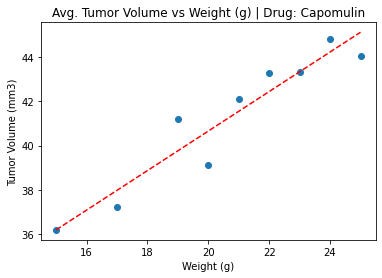

In [62]:
#Class demo - matplotlib day 3
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin
cap_weight = cap_weight_avg_tumor.iloc[:,0]
cap_tumor = cap_weight_avg_tumor.iloc[:,1]
correlation = st.pearsonr(cap_weight, cap_tumor)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(cap_weight, cap_tumor)
regress_values = cap_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap_weight, cap_tumor)
plt.plot(cap_weight,regress_values, "r--")
# plt.annotate(line_eq,(0,50),fontsize=5,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Avg. Tumor Volume vs Weight (g) | Drug: Capomulin")
print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")
plt.show()